In [1]:
%matplotlib inline
import matplotlib 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (16, 10)})
matplotlib.rc('font', family='simhei')

我们聚合出了一份 2019 年度的用户下单样例数据，有三个字段，首单月，下单月，用户量

In [2]:
df1 = pd.read_csv("./data/order_user_cnt_cohort_sample_data.csv")
df1.head()

,首单年月,下单年月,user_cnt
0,2019-01,2019-01,88760
1,2019-01,2019-02,9552
2,2019-02,2019-02,87155
3,2019-03,2019-03,101254
4,2019-02,2019-03,10453


创建透视表，其实透视表就可以看出留存情况了，只是没那么好理解

In [3]:
df2 = df1.pivot_table(
    index=['首单年月'], columns='下单年月', values='user_cnt')
df2

下单年月,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
首单年月,,,,,,,,,,,,
2019-01,88760.0,9552.0,8207.0,6403.0,5178.0,4894.0,3343.0,3063.0,2443.0,1966.0,3212.0,2278.0
2019-02,NaN,87155.0,10453.0,6388.0,5511.0,4673.0,3335.0,3024.0,2503.0,1815.0,2889.0,1991.0
2019-03,NaN,NaN,101254.0,10673.0,8068.0,6835.0,4769.0,4180.0,3531.0,2671.0,4078.0,2841.0
2019-04,NaN,NaN,NaN,102449.0,10497.0,9495.0,5869.0,5164.0,4244.0,3177.0,5519.0,3600.0
2019-05,NaN,NaN,NaN,NaN,89913.0,11471.0,6562.0,5420.0,4240.0,3090.0,5278.0,3611.0
2019-06,NaN,NaN,NaN,NaN,NaN,82524.0,7230.0,5491.0,4311.0,3013.0,6027.0,3579.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,66243.0,6927.0,4457.0,3309.0,5105.0,3090.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63119.0,5325.0,3454.0,4656.0,3245.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55891.0,4336.0,5745.0,3748.0


现在我们按下单月顺序排列

In [4]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = df1.groupby('首单年月').apply(cohort_period)
cohorts.head()

,首单年月,下单年月,user_cnt,CohortPeriod
0,2019-01,2019-01,88760,1
1,2019-01,2019-02,9552,2
2,2019-02,2019-02,87155,1
3,2019-03,2019-03,101254,1
4,2019-02,2019-03,10453,2


In [5]:
cohorts.set_index(['首单年月', 'CohortPeriod'], inplace=True)
cohorts.head()

下单年月  user_cnt
首单年月    CohortPeriod                   
2019-01 1             2019-01     88760
        2             2019-02      9552
2019-02 1             2019-02     87155
2019-03 1             2019-03    101254
2019-02 2             2019-03     10453

In [6]:
cohort_group_size = cohorts['user_cnt'].groupby('首单年月').first()
cohort_group_size

首单年月
2019-01     88760
2019-02     87155
2019-03    101254
2019-04    102449
2019-05     89913
2019-06     82524
2019-07     66243
2019-08     63119
2019-09     55891
2019-10     45593
2019-11     69600
2019-12     47870
Name: user_cnt, dtype: int64

In [7]:
cohorts['user_cnt'].unstack(0)

首单年月,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,88760.0,87155.0,101254.0,102449.0,89913.0,82524.0,66243.0,63119.0,55891.0,45593.0,69600.0,47870.0
2,9552.0,10453.0,10673.0,10497.0,11471.0,7230.0,6927.0,5325.0,4336.0,5389.0,5860.0,NaN
3,8207.0,6388.0,8068.0,9495.0,6562.0,5491.0,4457.0,3454.0,5745.0,3550.0,NaN,NaN
4,6403.0,5511.0,6835.0,5869.0,5420.0,4311.0,3309.0,4656.0,3748.0,NaN,NaN,NaN
5,5178.0,4673.0,4769.0,5164.0,4240.0,3013.0,5105.0,3245.0,NaN,NaN,NaN,NaN
6,4894.0,3335.0,4180.0,4244.0,3090.0,6027.0,3090.0,NaN,NaN,NaN,NaN,NaN
7,3343.0,3024.0,3531.0,3177.0,5278.0,3579.0,NaN,NaN,NaN,NaN,NaN,NaN
8,3063.0,2503.0,2671.0,5519.0,3611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2443.0,1815.0,4078.0,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


转换成百分比

In [8]:
user_retention = cohorts['user_cnt'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

首单年月,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.107616,0.119936,0.105408,0.102461,0.127579,0.087611,0.104570,0.084364,0.077580,0.118198,0.084195,NaN
3,0.092463,0.073295,0.079681,0.092680,0.072982,0.066538,0.067283,0.054722,0.102789,0.077863,NaN,NaN
4,0.072138,0.063232,0.067504,0.057287,0.060280,0.052239,0.049952,0.073765,0.067059,NaN,NaN,NaN
5,0.058337,0.053617,0.047099,0.050406,0.047157,0.036511,0.077065,0.051411,NaN,NaN,NaN,NaN
6,0.055137,0.038265,0.041282,0.041425,0.034367,0.073033,0.046646,NaN,NaN,NaN,NaN,NaN
7,0.037663,0.034697,0.034873,0.031011,0.058701,0.043369,NaN,NaN,NaN,NaN,NaN,NaN
8,0.034509,0.028719,0.026379,0.053871,0.040161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.027524,0.020825,0.040275,0.035139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


通过颜色渐变的方式用热图展示出来，现在我们可以对比第三个月的留存情况

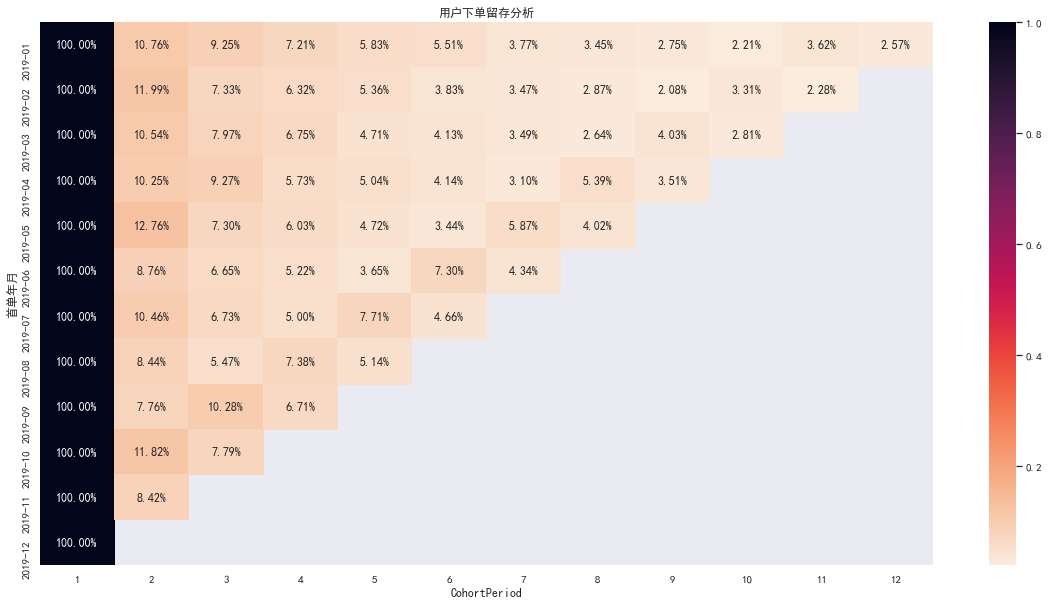

In [9]:
plt.figure(figsize=(20, 10))
plt.title('用户下单留存分析')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, cmap="rocket_r", fmt='.2%');